In [79]:
#importing important library
#task is to determine the player based on the attributes/features
import numpy as np
import pandas as pd

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt


data = pd.read_csv("../data/Shakespeare_data.csv")
data.drop(data.index[:3], inplace=True)

In [80]:
data.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [81]:
print(data.shape)

(111393, 6)


In [82]:
#we have 6 features and 111396 types pf Lines
unique_plays = set(data['Play'])
unique_players = set(data['Player'])
print(len(unique_plays))
print(len(unique_players))


36
935


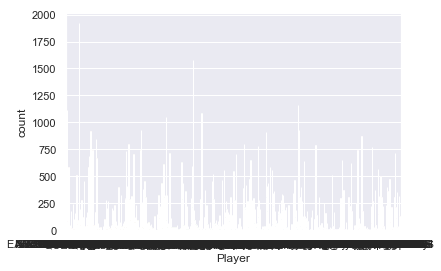

In [83]:
#We've 36 types of plays and 935 type of players

#data = pd.read_csv("../data/Shakespeare_data.csv")

sns.countplot(data['Player'],label="Count")
plt.show()

In [84]:
#gathering information about different columns in the dataset
#columns with object datatype could be the possible categorical features of the dataset e.g. Play
print(data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 111393 entries, 3 to 111395
Data columns (total 6 columns):
Dataline            111393 non-null int64
Play                111393 non-null object
PlayerLinenumber    111393 non-null float64
ActSceneLine        105153 non-null object
Player              111389 non-null object
PlayerLine          111393 non-null object
dtypes: float64(1), int64(1), object(4)
memory usage: 10.9+ MB
None


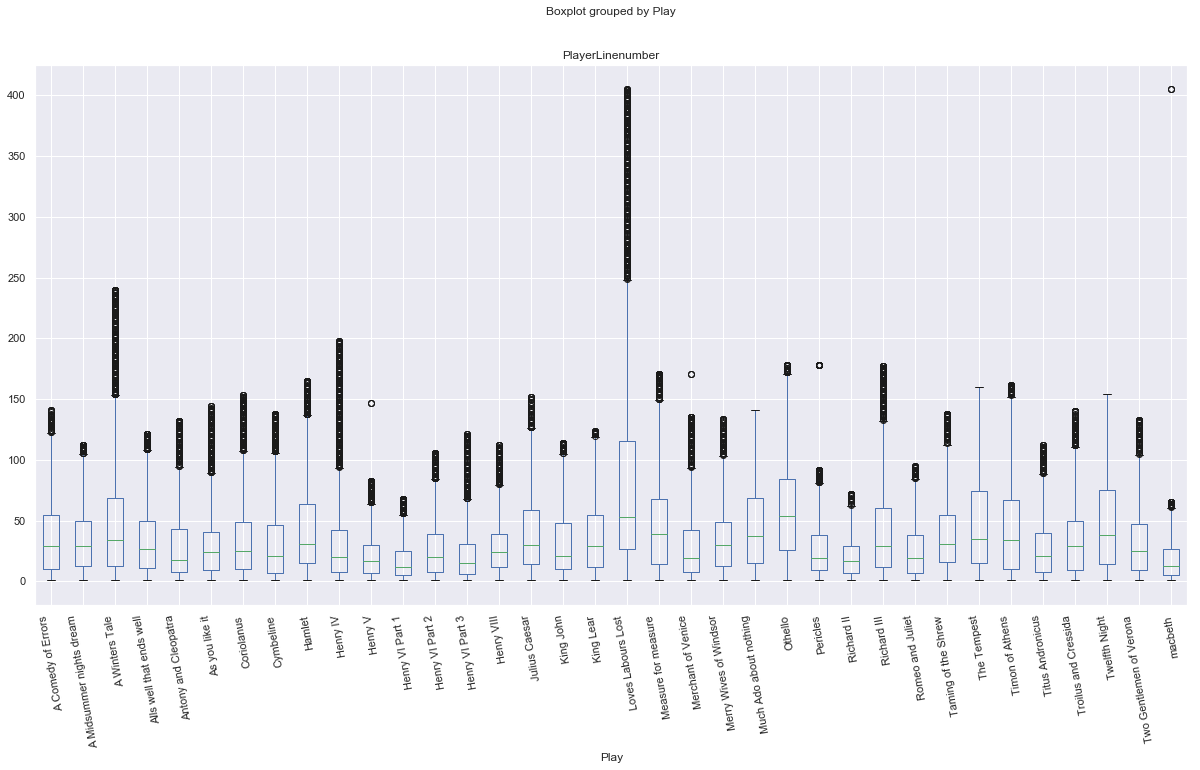

In [85]:
#analyze the relationship between a categorical feature and a continuous feature is to plot a boxplot
data.boxplot('PlayerLinenumber','Play',rot = 100,figsize=(20,10))

In [86]:
#filter out the object data
#data_object = data.select_dtypes(include=['object']).copy()
data_object = data
data_object.head()

,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine
3,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,"
4,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,"
5,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils
6,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.
7,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil


In [87]:
#find total no. of null values in the dataset
print(data_object.isnull().values.sum())

6244


In [88]:
#columnwise distribution of null values
print(data_object.isnull().sum())

Dataline               0
Play                   0
PlayerLinenumber       0
ActSceneLine        6240
Player                 4
PlayerLine             0
dtype: int64


In [89]:
#handling the missing values using fillna()
data_object = data_object.fillna(data['ActSceneLine'].value_counts().index[0])

In [90]:
#no. of null values after mode imputation
print(data_object.isnull().values.sum())

0


In [91]:
#frequency distribution of categories within the feature
print(data_object['Play'].value_counts())

Hamlet                      4244
Coriolanus                  3992
Cymbeline                   3958
Richard III                 3941
Antony and Cleopatra        3862
King Lear                   3766
Othello                     3762
Troilus and Cressida        3711
A Winters Tale              3489
Henry VIII                  3419
Henry V                     3395
Henry VI Part 2             3334
Romeo and Juliet            3313
Henry IV                    3202
Henry VI Part 3             3138
Alls well that ends well    3083
Measure for measure         2998
Loves Labours Lost          2986
Henry VI Part 1             2983
Richard II                  2937
Merry Wives of Windsor      2831
As you like it              2822
Taming of the Shrew         2806
Merchant of Venice          2802
Julius Caesar               2771
King John                   2766
Titus Andronicus            2726
Much Ado about nothing      2704
Timon of Athens             2662
Twelfth Night               2648
Pericles  

In [92]:
#count of distinct feature in the category "Play"
print(data_object['Play'].value_counts().count())

36


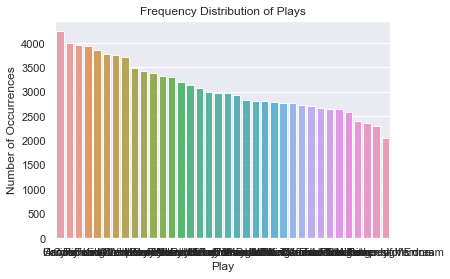

In [93]:
play_count = data_object['Play'].value_counts()
#fig, ax = plt.subplots()
#fig.set_size_inches(11.7, 8.27)
sns.set(style="darkgrid")
sns.barplot(play_count.index, play_count.values, alpha=0.9)
plt.title('Frequency Distribution of Plays')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Play', fontsize=12)
plt.show()

In [69]:
#Encoding the Plays categories
play_labels = data_object['Play'].astype('category').cat.categories.tolist()
play_category = {'Play' : {k: v for k,v in zip(play_labels,list(range(1,len(play_labels)+1)))}}

print(play_category)

{'Play': {'A Comedy of Errors': 1, 'A Midsummer nights dream': 2, 'A Winters Tale': 3, 'Alls well that ends well': 4, 'Antony and Cleopatra': 5, 'As you like it': 6, 'Coriolanus': 7, 'Cymbeline': 8, 'Hamlet': 9, 'Henry IV': 10, 'Henry V': 11, 'Henry VI Part 1': 12, 'Henry VI Part 2': 13, 'Henry VI Part 3': 14, 'Henry VIII': 15, 'Julius Caesar': 16, 'King John': 17, 'King Lear': 18, 'Loves Labours Lost': 19, 'Measure for measure': 20, 'Merchant of Venice': 21, 'Merry Wives of Windsor': 22, 'Much Ado about nothing': 23, 'Othello': 24, 'Pericles': 25, 'Richard II': 26, 'Richard III': 27, 'Romeo and Juliet': 28, 'Taming of the Shrew': 29, 'The Tempest': 30, 'Timon of Athens': 31, 'Titus Andronicus': 32, 'Troilus and Cressida': 33, 'Twelfth Night': 34, 'Two Gentlemen of Verona': 35, 'macbeth': 36}}


In [70]:
data_object.replace(play_category, inplace=True)
print(data_object.head())

   Dataline  Play  PlayerLinenumber ActSceneLine         Player  \
3         4    10               1.0        1.1.1  KING HENRY IV   
4         5    10               1.0        1.1.2  KING HENRY IV   
5         6    10               1.0        1.1.3  KING HENRY IV   
6         7    10               1.0        1.1.4  KING HENRY IV   
7         8    10               1.0        1.1.5  KING HENRY IV   

                                       PlayerLine  
3          So shaken as we are, so wan with care,  
4      Find we a time for frighted peace to pant,  
5  And breathe short-winded accents of new broils  
6         To be commenced in strands afar remote.  
7       No more the thirsty entrance of this soil  


In [71]:
feature_names = ['PlayerLinenumber','Play']
x = data_object[feature_names]
y = data_object['Player']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=0)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [72]:
#Importing the Decision tree classifier from the sklearn library.
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(criterion = 'entropy')

In [73]:
#Training the decision tree classifier. 
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [74]:
#Predicting labels on the test set.
y_pred =  clf.predict(x_test)

In [77]:
#Importing the accuracy metric from sklearn.metrics library

from sklearn.metrics import accuracy_score
print('Accuracy Score on train data: ', accuracy_score(y_true=y_train, y_pred=clf.predict(x_train)))
print('Accuracy Score on test data: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Accuracy Score on train data:  0.40668132953295777
Accuracy Score on test data:  0.41500965034337267


In [94]:
#Following are the advantages of decision trees: - 
#Easy to use and understand. - Can handle both categorical and numerical data. - 
#Resistant to outliers, hence require little data preprocessing. - 
#New features can be easily added. - Can be used to build larger classifiers by using ensemble methods.

#Following are the disadvantages of decision trees: - Prone to overfitting. - 
#Require some kind of measurement as to how well they are doing. - 
#Need to be careful with parameter tuning. - Can create biased learned trees if some classes dominate.